# Problem Statement: -
A retail store in India, has its transaction data, and it would like to know the buying pattern of the consumers in its locality, you have been assigned this task to provide the manager with rules on how the placement of products needs to be there in shelves so that it can improve the buying patterns of consumes and increase customer footfall



# Objective :- 
use the Association rules concept and improve the buying patterns of consumes and increase customer footfall

In [34]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
dataset = pd.read_csv("D:\\360Digi\\transactions_retail1.csv", sep=";", header= None)

In [36]:
dataset= dataset[0:5000]
dataset

,0
0,"'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA"
1,"'LANTERN','METAL','WHITE',NA,NA,NA"
2,"'COAT','CREAM','CUPID','HANGER','HEARTS',NA"
3,"'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'"
4,"'HEART.','HOTTIE','RED','WHITE','WOOLLY',NA"
...,...
4995,"'KIT','SEWING','TRAVEL',NA,NA,NA"
4996,"'CAKE','RED','RETROSPOT','ROUND','TINS',NA"
4997,"'BASKET','PICNIC','SMALL','WICKER',NA,NA"
4998,"'CAN','CREAM','ENAMEL','WATERING',NA,NA"


In [37]:
unique_items_list = []

# for each index it will iter row by row
for index, row in dataset.iterrows():  
    
    # splitting items with , and creating a new list for row & it will going add it agian 
    # ...item_series list for each iteration..so item_series will be list of lists..
    items_series = list(row.str.split(','))
    
    
    # agian reading each list elements from item_Series which is big list as mentioned above code
    for each_row_list in items_series:
        
        # iterating each item from each_row_lists
        for item in each_row_list:
            
            # for first iteration..unique_items_list is empty so first item directly append to it.
            #...from next onwards..it will start to check condition 'not in'
            #....& if item not found in unique_items_list list then it will append to it.
            #......finally we will get one unique item list..
            if item not in unique_items_list:
                unique_items_list.append(item)

In [38]:
unique_items_list

["'HANGING'",
 "'HEART'",
 "'HOLDER'",
 "'T-LIGHT'",
 "'WHITE'",
 'NA',
 "'LANTERN'",
 "'METAL'",
 "'COAT'",
 "'CREAM'",
 "'CUPID'",
 "'HANGER'",
 "'HEARTS'",
 "'BOTTLE'",
 "'FLAG'",
 "'HOT'",
 "'KNITTED'",
 "'UNION'",
 "'WATER'",
 "'HEART.'",
 "'HOTTIE'",
 "'RED'",
 "'WOOLLY'",
 "'7'",
 "'BABUSHKA'",
 "'BOXES'",
 "'NESTING'",
 "'SET'",
 "'FROSTED'",
 "'GLASS'",
 "'STAR'",
 "'HAND'",
 "'JACK'",
 "'WARMER'",
 "'DOT'",
 "'POLKA'",
 "'ASSORTED'",
 "'BIRD'",
 "'COLOUR'",
 "'ORNAMENT'",
 "'BEDROOM'",
 "'PLAYHOUSE'",
 "'POPPY''S'",
 "'KITCHEN'",
 "'CHARLOTTE'",
 "'DOLL'",
 "'FELTCRAFT'",
 "'PRINCESS'",
 "'COSY'",
 "'IVORY'",
 "'MUG'",
 "'6'",
 "'BOX'",
 "'OF'",
 "'TEASPOONS'",
 "'BLOCKS'",
 "'JIGSAW'",
 "'VINTAGE'",
 "'ALPHABET'",
 "'BLOCK'",
 "'BUILDING'",
 "'HOME'",
 "'WORD'",
 "'LOVE'",
 "'RECIPE'",
 "'WITH'",
 "'DOORMAT'",
 "'ENGLAND'",
 "'NEW'",
 "'JAM'",
 "'JARS'",
 "'MAKING'",
 "'FASHION'",
 "'PARIS'",
 "'RACK'",
 "'YELLOW'",
 "'BLUE'",
 "'BATH'",
 "'ALARM'",
 "'BAKELIKE'",
 "'CLOCK'"

In [39]:
unique_items_list.remove("NA")
unique_items_list

["'HANGING'",
 "'HEART'",
 "'HOLDER'",
 "'T-LIGHT'",
 "'WHITE'",
 "'LANTERN'",
 "'METAL'",
 "'COAT'",
 "'CREAM'",
 "'CUPID'",
 "'HANGER'",
 "'HEARTS'",
 "'BOTTLE'",
 "'FLAG'",
 "'HOT'",
 "'KNITTED'",
 "'UNION'",
 "'WATER'",
 "'HEART.'",
 "'HOTTIE'",
 "'RED'",
 "'WOOLLY'",
 "'7'",
 "'BABUSHKA'",
 "'BOXES'",
 "'NESTING'",
 "'SET'",
 "'FROSTED'",
 "'GLASS'",
 "'STAR'",
 "'HAND'",
 "'JACK'",
 "'WARMER'",
 "'DOT'",
 "'POLKA'",
 "'ASSORTED'",
 "'BIRD'",
 "'COLOUR'",
 "'ORNAMENT'",
 "'BEDROOM'",
 "'PLAYHOUSE'",
 "'POPPY''S'",
 "'KITCHEN'",
 "'CHARLOTTE'",
 "'DOLL'",
 "'FELTCRAFT'",
 "'PRINCESS'",
 "'COSY'",
 "'IVORY'",
 "'MUG'",
 "'6'",
 "'BOX'",
 "'OF'",
 "'TEASPOONS'",
 "'BLOCKS'",
 "'JIGSAW'",
 "'VINTAGE'",
 "'ALPHABET'",
 "'BLOCK'",
 "'BUILDING'",
 "'HOME'",
 "'WORD'",
 "'LOVE'",
 "'RECIPE'",
 "'WITH'",
 "'DOORMAT'",
 "'ENGLAND'",
 "'NEW'",
 "'JAM'",
 "'JARS'",
 "'MAKING'",
 "'FASHION'",
 "'PARIS'",
 "'RACK'",
 "'YELLOW'",
 "'BLUE'",
 "'BATH'",
 "'ALARM'",
 "'BAKELIKE'",
 "'CLOCK'",
 "'PI

In [40]:
df_apriori = pd.DataFrame(columns=unique_items_list)

In [41]:
dataset1 =df_apriori.copy()

In [42]:
## If for the item names obesrved w.r.t. each list will be assigned as number 1 & those items are not in 
##...row number iterating will be assigned with nuber 0.

for index, row in dataset.iterrows():
    items = str(row[0]).split(',')
    one_hot_encoding = np.zeros(len(unique_items_list),dtype=int)
    for item_name in items:
        for i,column in enumerate(dataset1.columns):
            if item_name == column:
                one_hot_encoding[i] = 1
    dataset1.at[index] = one_hot_encoding

# Transction encoder is fastest method to do all this.

In [43]:
dataset1.head()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE','LANTERN','METAL','COAT','CREAM','CUPID',...,'ANIMAL','FARM','SNOWSTORM','TINSEL','SPACE','CADET','MONSTERS','CITRONELLA','BURST','WEEKEND'
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
zero =[]
one = []
for i in df_apriori.columns:
    zero.append(list(dataset1[i].value_counts())[0])
    one.append(list(dataset1[i].value_counts())[1])

In [45]:
count_df = pd.DataFrame([zero,one], columns=df_apriori.copy().columns)

In [46]:
count_df.head()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE','LANTERN','METAL','COAT','CREAM','CUPID',...,'ANIMAL','FARM','SNOWSTORM','TINSEL','SPACE','CADET','MONSTERS','CITRONELLA','BURST','WEEKEND'
0,4868,4688,4811,4835,4740,4971,4843,4970,4914,4983,...,4999,4999,4999,4999,4994,4997,4999,4999,4999,4999
1,132,312,189,165,260,29,157,30,86,17,...,1,1,1,1,6,3,1,1,1,1


In [47]:

count_df.index = ['Not_Purchased', 'Purchased']
count_df

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE','LANTERN','METAL','COAT','CREAM','CUPID',...,'ANIMAL','FARM','SNOWSTORM','TINSEL','SPACE','CADET','MONSTERS','CITRONELLA','BURST','WEEKEND'
Not_Purchased,4868,4688,4811,4835,4740,4971,4843,4970,4914,4983,...,4999,4999,4999,4999,4994,4997,4999,4999,4999,4999
Purchased,132,312,189,165,260,29,157,30,86,17,...,1,1,1,1,6,3,1,1,1,1


In [53]:

print('maximum purchased item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('minimum purchased item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())

maximum purchased item: 'RED' : 472
minimum purchased item: 'TOMATO' : 4999


In [54]:

sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df.head(20)

,Not_Purchased,Purchased
'RED',4528,472
'SET',4586,414
'OF',4644,356
'CHRISTMAS',4663,337
'RETROSPOT',4670,330
'HEART',4688,312
'BOX',4739,261
'WHITE',4740,260
'VINTAGE',4742,258
'BAG',4748,252


In [55]:

sorted_df['Purchased%']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df.head()

,Not_Purchased,Purchased,Purchased%
'RED',4528,472,0.021915
'SET',4586,414,0.019222
'OF',4644,356,0.016529
'CHRISTMAS',4663,337,0.015647
'RETROSPOT',4670,330,0.015322


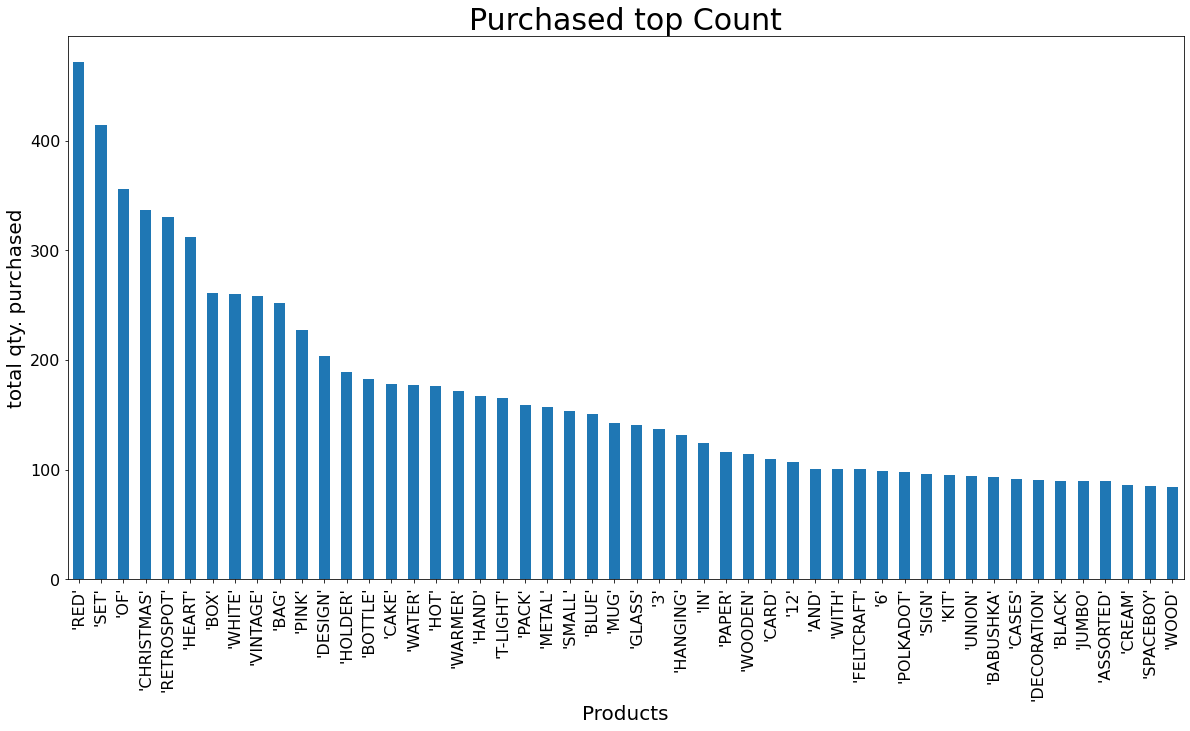

In [56]:

fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('total qty. purchased', fontsize=20)
plt.show()

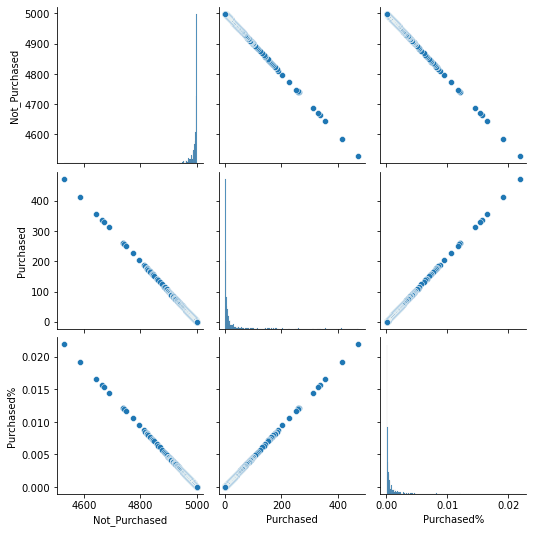

<Figure size 576x576 with 0 Axes>

In [69]:
sns.pairplot(sorted_df)
plt.figure(figsize=(8,8))
plt.show()

In [70]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(dataset1, min_support=0.02, use_colnames=True, max_len=5)

<ipython-input-76-07a3e6c49dca>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')


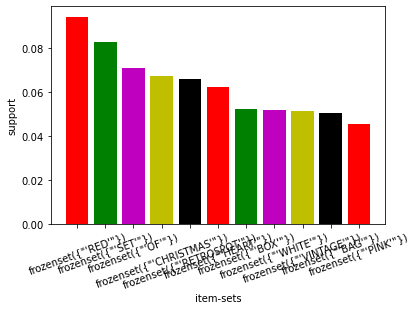

In [76]:

# Most Frequent item sets based on support 
freq_items.sort_values('support', ascending = False, inplace = True)

plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), freq_items.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [73]:

rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

NameError: name 'frequent_itemsets' is not defined

In [60]:
#Building Association rules using confidence metrics

In [64]:
# for this we need support value dataframe..that is fre_items from measure1.

confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

# min_threshold is nothing but setting min % crieteria. In this case i have choosen 20% 
#...confidence should be minimum 20%.

In [65]:
confidence_association.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,('HOLDER'),('T-LIGHT'),0.0378,0.0330,0.0262,0.693122,21.003688,0.024953,3.151086
1,('T-LIGHT'),('HOLDER'),0.0330,0.0378,0.0262,0.793939,21.003688,0.024953,4.669500
2,('HOT'),('BOTTLE'),0.0352,0.0366,0.0346,0.982955,26.856682,0.033312,56.519467
3,('BOTTLE'),('HOT'),0.0366,0.0352,0.0346,0.945355,26.856682,0.033312,17.655840
4,('BOTTLE'),('WATER'),0.0366,0.0354,0.0324,0.885246,25.006946,0.031104,8.405800
5,('WATER'),('BOTTLE'),0.0354,0.0366,0.0324,0.915254,25.006946,0.031104,11.368120
6,('HOT'),('WATER'),0.0352,0.0354,0.0324,0.920455,26.001541,0.031154,12.126400
7,('WATER'),('HOT'),0.0354,0.0352,0.0324,0.915254,26.001541,0.031154,11.384640
8,('RETROSPOT'),('RED'),0.0660,0.0944,0.0384,0.581818,6.163328,0.032170,2.165565
9,('RED'),('RETROSPOT'),0.0944,0.0660,0.0384,0.406780,6.163328,0.032170,1.574457


In [74]:

rules = association_rules(freq_items, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,('HOT'),"('BOTTLE', 'WATER')",0.0352,0.0324,0.0324,0.920455,28.409091,0.031260,12.164114
18,"('BOTTLE', 'WATER')",('HOT'),0.0324,0.0352,0.0324,1.000000,28.409091,0.031260,inf
12,('WARMER'),('HAND'),0.0344,0.0334,0.0320,0.930233,27.851274,0.030851,13.854600
13,('HAND'),('WARMER'),0.0334,0.0344,0.0320,0.958084,27.851274,0.030851,23.036457
20,('BOTTLE'),"('HOT', 'WATER')",0.0366,0.0324,0.0324,0.885246,27.322404,0.031214,8.431943
17,"('HOT', 'WATER')",('BOTTLE'),0.0324,0.0366,0.0324,1.000000,27.322404,0.031214,inf
2,('HOT'),('BOTTLE'),0.0352,0.0366,0.0346,0.982955,26.856682,0.033312,56.519467
3,('BOTTLE'),('HOT'),0.0366,0.0352,0.0346,0.945355,26.856682,0.033312,17.655840
21,('WATER'),"('HOT', 'BOTTLE')",0.0354,0.0346,0.0324,0.915254,26.452435,0.031175,11.391720
16,"('HOT', 'BOTTLE')",('WATER'),0.0346,0.0354,0.0324,0.936416,26.452435,0.031175,15.170527


###### 1 . Antecedent and Consequent
The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

2. antecedent support
It is antecedent support with all transction numbers.

3. consequent support
It is consequent support with all transction numbers.

4. Support:
Here support is considered for antecedent+consequent combination.

5. confidence
Confidence is related to 'consequent item' or 'consequent item combination' w.r.t. antecedent item or item set.

6. lift
Lift measures how many times more often X and Y occur together than expected if they where statistically independent. Lift is not down-ward closed and does not suffer from the rare item problem.

In short firm possibilities of buying consequent whenever Antecedent item is purchaed by customer

7. Leverage
Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.

leverage also can suffer from the rare item problem.

leverage(X -> Y) = P(X and Y) - (P(X)P(Y))

8. conviction
conviction(X -> Y) = P(X)P(not Y)/P(X and not Y)=(1-sup(Y))/(1-conf(X -> Y))

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.

9. Coverage
coverage(X) = P(X) = sup(X)

A simple measure of how often a item set appears in the data set.

# Summary:

1- Above the 10  Rule that we get by Apply Apriori Algo.

2- Antecedent support variable tells us probability of antecedent product alone.

3- The Support Value is the value of the two Product(Antecedents and Consequents)

4- Confidence is an indication of how often the rule has been found to be True.

5-The ratio of the observed support to that expected if X and Y were independent.